C:\Users\prathamesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 403ms/step - accuracy: 0.3415 - loss: 1.6010 - val_accuracy: 0.5858 - val_loss: 1.0876
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 366ms/step - accuracy: 0.5665 - loss: 1.0716 - val_accuracy: 0.6431 - val_loss: 0.9612
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.6662 - loss: 0.8743 - val_accuracy: 0.6567 - val_loss: 0.9223
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 382ms/step - accuracy: 0.7153 - loss: 0.7420 - val_accuracy: 0.6540 - val_loss: 0.9161
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 386ms/step - accuracy: 0.7781 - loss: 0.6242 - val_accuracy: 0.6349 - val_loss: 1.0439
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 367ms/step - accuracy: 0.8319 - loss: 0.4614 - val_accuracy: 0.6676 - val_loss: 0.9571
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 385ms/step - accuracy: 0.8949 - loss: 0.3194 - val_accuracy: 0.6458 - val_loss: 1.1307
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 377ms/step - accuracy: 0.9421 - loss: 0.2012 - val_accu

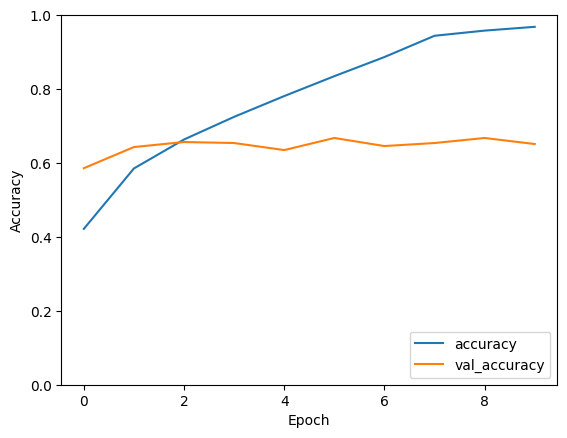

12/12 - 1s - 124ms/step - accuracy: 0.6785 - loss: 1.7717
Test accuracy: 67.85%
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.36.1, however version 4.44.1 is available, please upgrade.
--------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [1]:
# Ensure all required libraries are installed
!pip install tensorflow gradio tensorflow-datasets matplotlib

# Step 1: Load Libraries and Data
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import gradio as gr
import numpy as np

# Load the TensorFlow Flowers dataset
(train_ds, val_ds, test_ds), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    as_supervised=True,
    with_info=True
)

# Define the class names
class_names = ds_info.features['label'].names

# Step 2: Data Preprocessing
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    image = image / 255.0
    return image, label

train_ds = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

# Step 3: Model Building
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Print the model summary
model.summary()

# Step 4: Model Training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10)

# Step 5: Model Evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Step 6: Gradio Interface
def classify_image(image):
    # Convert PIL Image to numpy array
    image = np.array(image)
    # Preprocess the input image
    image = tf.image.resize(image, (128, 128)) / 255.0
    image = tf.expand_dims(image, axis=0)  # Add batch dimension
    predictions = model.predict(image)
    predicted_class = tf.argmax(predictions[0]).numpy()
    confidence = tf.nn.softmax(predictions[0])[predicted_class].numpy()
    return {class_names[i]: float(conf) for i, conf in enumerate(tf.nn.softmax(predictions[0]))}, class_names[predicted_class], confidence

# Define the Gradio interface
gr_interface = gr.Interface(
    fn=classify_image, 
    inputs=gr.Image(type="pil"), 
    outputs=[
        gr.Label(num_top_classes=3), 
        gr.Textbox(label="Predicted Class"), 
        gr.Textbox(label="Confidence")
    ]
)

# Launch the Gradio interface
gr_interface.launch()
